In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.patches as mplpatches
import plotnine as p9
import scanpy as sc

In [2]:
p9.options.dpi=300
plt.rcParams['svg.fonttype']='none' 

In [3]:
sc.settings.verbosity = 0             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=300)

In [5]:
adata=sc.read_h5ad(D0data_dir+'/OAK1to20_GEXwLineage_normalized.h5ad')

In [6]:
df_LineageResis=pd.DataFrame(columns=['SubLibrary_count', 'Cells_inResisLineage'])
for i in range(20):
    df_LineageResis.loc[i,'SubLibrary_count']=i+1
    df_LineageResis.loc[i,'Cells_inResisLineage']=sum(adata.obs[adata.obs.aliquot.astype(int)<i+2].Lineage_assigned.isin(['GENBC0283767']))

In [7]:
df_LineageResis

,SubLibrary_count,Cells_inResisLineage
0,1,1
1,2,4
2,3,5
3,4,5
4,5,5
5,6,8
6,7,9
7,8,10
8,9,15
9,10,18


In [8]:
df_LineageResis = df_LineageResis.astype(int)

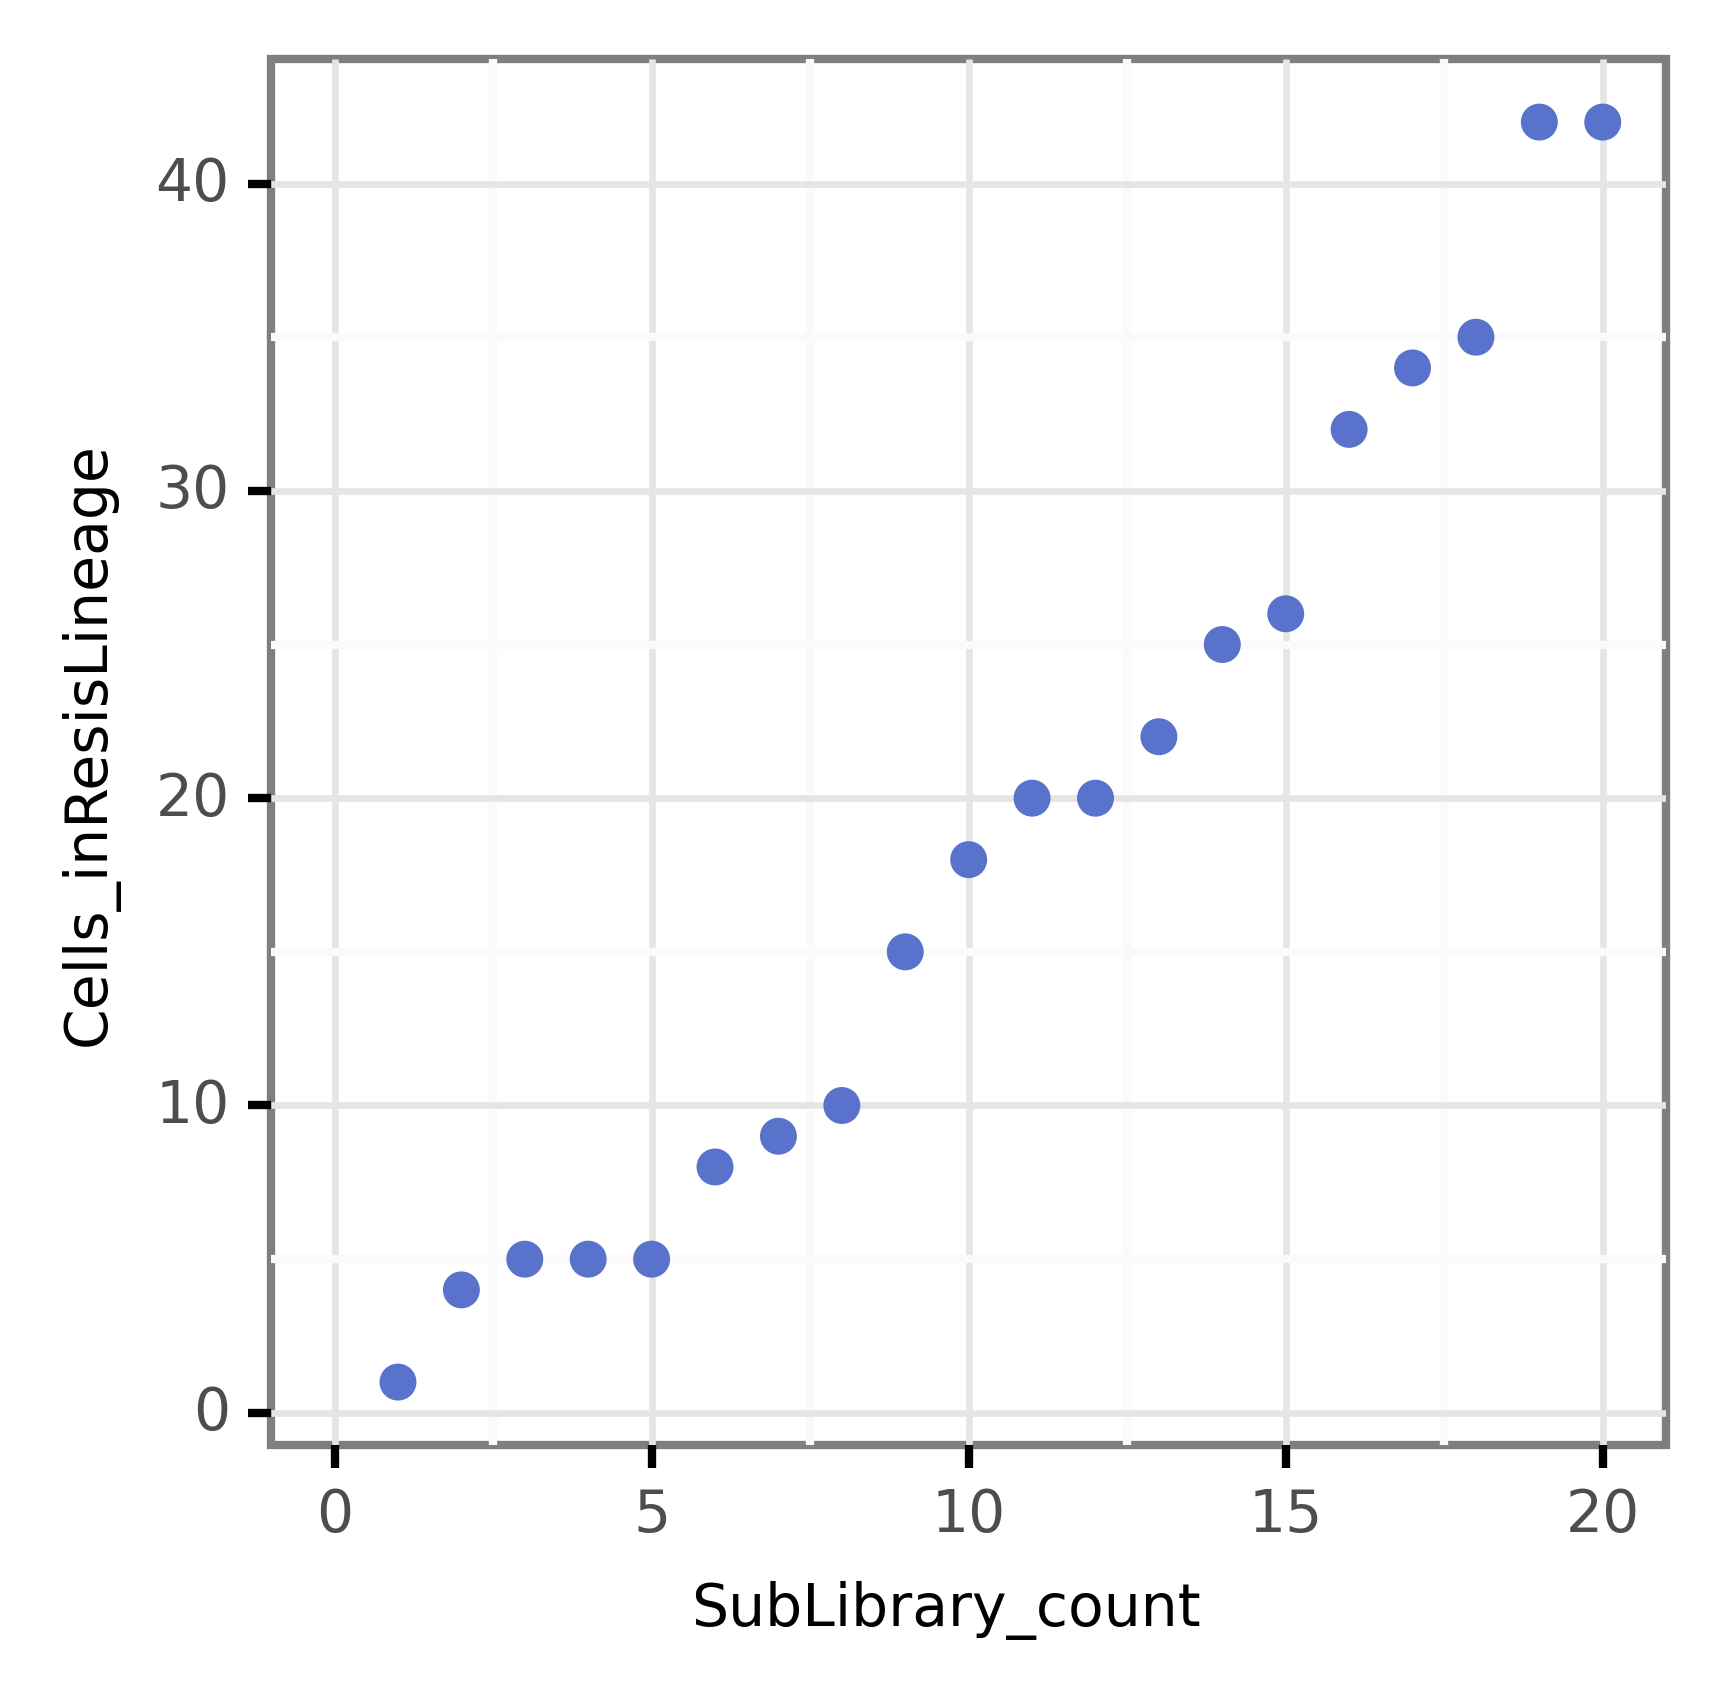

<ggplot: (2932106923749)>

In [9]:
plot=p9.ggplot(data=df_LineageResis,
           mapping=p9.aes(x='SubLibrary_count',
                          y='Cells_inResisLineage',
                         ),
              )
plot+p9.geom_point(color='#5972CB') \
+ p9.themes.theme_bw() \
+ p9.scale_x_continuous(limits=(0, 20)) \
+ p9.theme(text=p9.element_text(size=7)) \
+ p9.theme(figure_size=(3,3)) # 3 inch


In [10]:
plot=p9.ggplot(data=df_LineageResis,
           mapping=p9.aes(x='SubLibrary_count',
                          y='Cells_inResisLineage',
                         ),
              )
plotsave=plot+p9.geom_point(color='#5972CB') \
+ p9.themes.theme_bw() \
+ p9.scale_x_continuous(limits=(0, 20)) \
+ p9.xlab('Number of sub-libraries') \
+ p9.ylab('Number of cells in the resistant lineage') \
+ p9.theme(text=p9.element_text(size=7)) \
+ p9.theme(figure_size=(3,3)) # 3 inch
plotsave.save('ResistLineageCell_D0.svg',height=3,width=3,format='svg',dpi=300) 

/gstore/home/wub31/.conda/envs/scanpy_Mar2022_env/lib/python3.7/site-packages/plotnine/ggplot.py:721: PlotnineWarning: Saving 3 x 3 in image.
/gstore/home/wub31/.conda/envs/scanpy_Mar2022_env/lib/python3.7/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: ResistLineageCell_D0.svg
